# Mục lục
I. Đọc dữ liệu và tiền xử lý
II. EDA
III. Trà lời câu hỏi đặt ra

## I. Đọc dữ liệu và tiền xử lý
1. Đọc và kiểm tra dữ liệu
2. Xóa những cột, thuộc tính không cần thiết
3. Kiểm tra loại dữ liệu của từng cột
4. Kiểm tra giá trị null
5. Chuẩn hóa dữ liệu ngày giờ
6. Tạo những thuộc tính mới


## Exploratory Data Analysis
1. 10 giao dịch có tổng thanh toán cao nhất
2. 10 sản phẩm có doanh thu cao nhất
3. 10 sản phẩm có giá cao nhất
4. 10 sản phẩm có lượt mua nhiều nhất
5. 10 quốc gia có doanh số bán cao nhất
6. Tổng tiền của từng tháng trong năm 2019
7. Quốc gia có doanh số bán cao nhất trong từng tháng
8. Tổng số tiền mỗi tháng bán được từ 10 quốc gia có tổng doanh số bán cao nhất trong năm 2019
9. Tổng tiền mỗi tháng bán được từ 10 sản phẩm hàng đầu có doanh thu cao nhất trong năm 2019
10. Tổng số lượng mỗi tháng bán được từ 10 sản phẩm có doanh thu cao nhất trong năm 2019

## Answer Given Question
1. How was the sales trend over the months?
2. What are the most frequently purchased products?
3. How many products does the customer purchase in each transaction?
4. What are the most profitable segment customers?
5. Based on your findings, what strategy could you recommend to the business to gain more profit?

1. Xu hướng bán hàng qua các tháng như thế nà1. Xu hướng bán hàng qua các tháng như thế nào?
2. Những sản phẩm được mua thường xuyên nhất là gì?
3. Mỗi giao dịch khách hàng mua bao nhiêu sản phẩm?
4. Đâu là phân khúc khách hàng có lợi nhất?
5. Dựa trên những phát hiện của bạn, bạn có thể đề xuất chiến lược nào cho doanh nghiệp để thu được nhiều lợi nhuận hơn?o?
2. Những sản phẩm được mua thường xuyên nhất là gì?
3. Mỗi giao dịch khách hàng mua bao nhiêu sản phẩm?
4. Đâu là phân khúc khách hàng có lợi nhất?
5. Dựa trên những phát hiện của bạn, bạn có thể đề xuất chiến lược nào cho doanh nghiệp để thu được nhiều lợi nhuận hơn?

# Import Necessary Library

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# Data Loading and Preprocessing

In [52]:
# Read and Check Data 
df = pd.read_csv('SalesTransaction.csv')
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country
0,581482,12/9/2019,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom
1,581475,12/9/2019,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom
2,581475,12/9/2019,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom
3,581475,12/9/2019,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom
4,581475,12/9/2019,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom


In [53]:
# Check Column Datatype 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TransactionNo  536350 non-null  object 
 1   Date           536350 non-null  object 
 2   ProductNo      536350 non-null  object 
 3   ProductName    536350 non-null  object 
 4   Price          536350 non-null  float64
 5   Quantity       536350 non-null  int64  
 6   CustomerNo     536295 non-null  float64
 7   Country        536350 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.7+ MB


Columns Additional Information:
- TransactionNo (categorical): a six-digit unique number that defines each transaction. The letter “C” in the code indicates a cancellation.
- Date (numeric): the date when each transaction was generated.
- ProductNo (categorical): a five or six-digit unique character used to identify a specific product.
- Product (categorical): product/item name.
- Price (numeric): the price of each product per unit in pound sterling (£).
- Quantity (numeric): the quantity of each product per transaction. Negative values related to cancelled transactions.
- CustomerNo (categorical): a five-digit unique number that defines each customer.
- Country (categorical): name of the country where the customer resides.

In [54]:
# Convert Date DataType to Datetime
dateFormat = '%m/%d/%Y'
df['Date'] = pd.to_datetime(df['Date'],format = dateFormat)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 536350 entries, 0 to 536349
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   TransactionNo  536350 non-null  object        
 1   Date           536350 non-null  datetime64[ns]
 2   ProductNo      536350 non-null  object        
 3   ProductName    536350 non-null  object        
 4   Price          536350 non-null  float64       
 5   Quantity       536350 non-null  int64         
 6   CustomerNo     536295 non-null  float64       
 7   Country        536350 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.7+ MB


In [55]:
# Create New Columns : TotalMoney
df['TotalMoney'] = df['Price'] * df['Quantity']

# Create New Columns : Month
df['Month'] = pd.DatetimeIndex(df['Date']).month

# Create New Columns : Year
df['Year'] = pd.DatetimeIndex(df['Date']).year

df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,CustomerNo,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,17490.0,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,13069.0,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,13069.0,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,13069.0,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,13069.0,United Kingdom,71.64,12,2019


In [56]:
# Check Null Value 
df.isnull().sum() 

TransactionNo     0
Date              0
ProductNo         0
ProductName       0
Price             0
Quantity          0
CustomerNo       55
Country           0
TotalMoney        0
Month             0
Year              0
dtype: int64

In [57]:
# Delete /  Drop Unecessary Data 
df = df.drop(['CustomerNo'], axis = 1)
df.head() 

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64,12,2019


# Exploratory Data Analysis

In [58]:
df.head()

,TransactionNo,Date,ProductNo,ProductName,Price,Quantity,Country,TotalMoney,Month,Year
0,581482,2019-12-09,22485,Set Of 2 Wooden Market Crates,21.47,12,United Kingdom,257.64,12,2019
1,581475,2019-12-09,22596,Christmas Star Wish List Chalkboard,10.65,36,United Kingdom,383.40,12,2019
2,581475,2019-12-09,23235,Storage Tin Vintage Leaf,11.53,12,United Kingdom,138.36,12,2019
3,581475,2019-12-09,23272,Tree T-Light Holder Willie Winkie,10.65,12,United Kingdom,127.80,12,2019
4,581475,2019-12-09,23239,Set Of 4 Knick Knack Tins Poppies,11.94,6,United Kingdom,71.64,12,2019


#### 10 Transactions that Give Highest Total Money

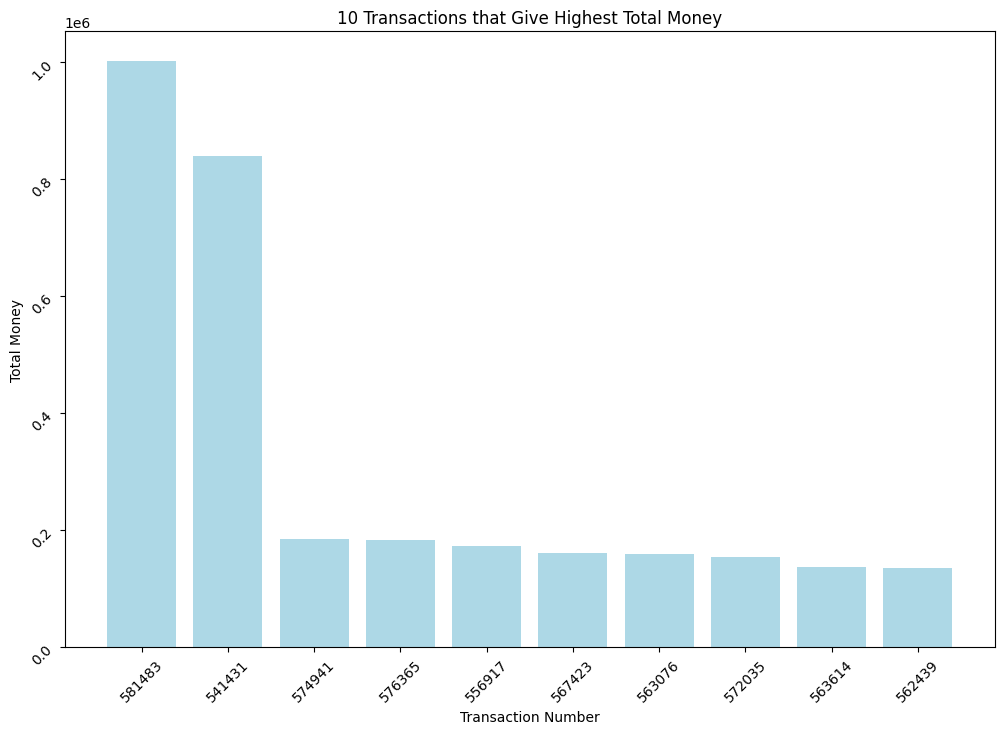

In [59]:
# Variable to Store Data
listTransaction = df['TransactionNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listTransaction:
    totalMoney = df['TotalMoney'].loc[df['TransactionNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictTransaction = {
    'TransactionNo' : listTransaction,
    'TotalMoney' : listTotalMoney
}

# Adjust DataFrame
dfTransaction = pd.DataFrame(dictTransaction)
dfTransaction = dfTransaction.sort_values('TotalMoney',ascending=False).head(10)
dfTransaction = dfTransaction.reset_index(drop=True)

# dfTransaction.to_csv('dfTransaction.csv')
# dfTransaction = pd.read_csv("dfTransaction.csv")

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfTransaction, x = 'TransactionNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Transactions that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Transaction Number')
plt.ylabel('Total Money')
plt.show()

In [70]:
dfTransaction

,TransactionNo,TotalMoney
0,581483,1002718.10
1,541431,840113.80
2,574941,184880.85
3,576365,184148.76
4,556917,172833.48
5,567423,161373.58
6,563076,159953.82
7,572035,153882.12
8,563614,137836.80
9,562439,135571.26


#### 10 Products that Give Highest Total Money

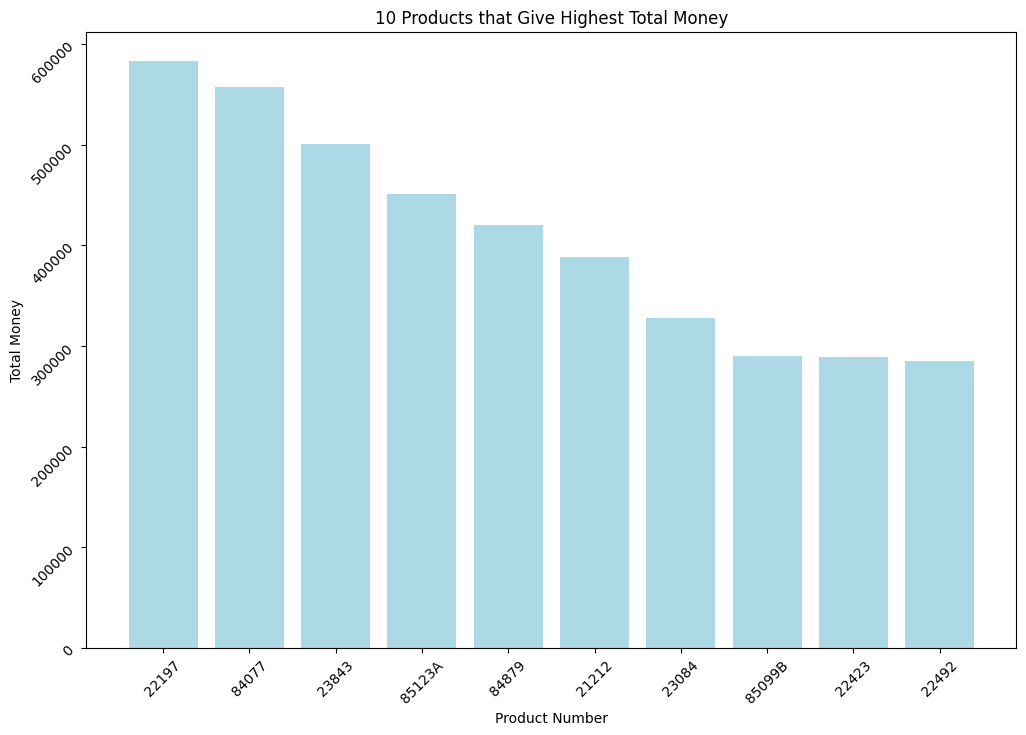

  ProductNo  TotalMoney                         ProductName
0     22197   583286.51                      Popcorn Holder
1     84077   557170.43   World War 2 Gliders Asstd Designs
2     23843   501359.05           Paper Craft Little Birdie
3    85123A   451401.70  Cream Hanging Heart T-Light Holder
4     84879   420743.70       Assorted Colour Bird Ornament
5     21212   388424.61     Pack Of 72 Retrospot Cake Cases
6     23084   327794.21                  Rabbit Night Light
7    85099B   290474.52             Jumbo Bag Red Retrospot
8     22423   289288.60            Regency Cakestand 3 Tier
9     22492   284870.92              Mini Paint Set Vintage


In [61]:
# Variable to Store Data
listProduct = df['ProductNo'].unique()
listTotalMoney = []

# Loop for Store Data
for i in listProduct:
    totalMoney = df['TotalMoney'].loc[df['ProductNo'] == i].sum()
    listTotalMoney.append(totalMoney)

# Dictionary for DataFrame
dictProduct = {
    'ProductNo' : listProduct,
    'TotalMoney' : listTotalMoney
}

# Adjust DataFrame
dfProduct = pd.DataFrame(dictProduct)
dfProduct = dfProduct.sort_values('TotalMoney',ascending=False).head(10)
dfProduct = dfProduct.reset_index(drop=True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfProduct, x = 'ProductNo',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Products that Give Highest Total Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('Product Number')
plt.ylabel('Total Money')
plt.show()

# Show Product Number, Product Name and Total Money
listProductName = []
for i in dfProduct['ProductNo']:
    a = df['ProductName'].loc[df['ProductNo'] == i].unique()[0]
    listProductName.append(a) 
dfProduct['ProductName'] = listProductName
print(dfProduct)

#### 10 Products Price that Give Highest Total Money

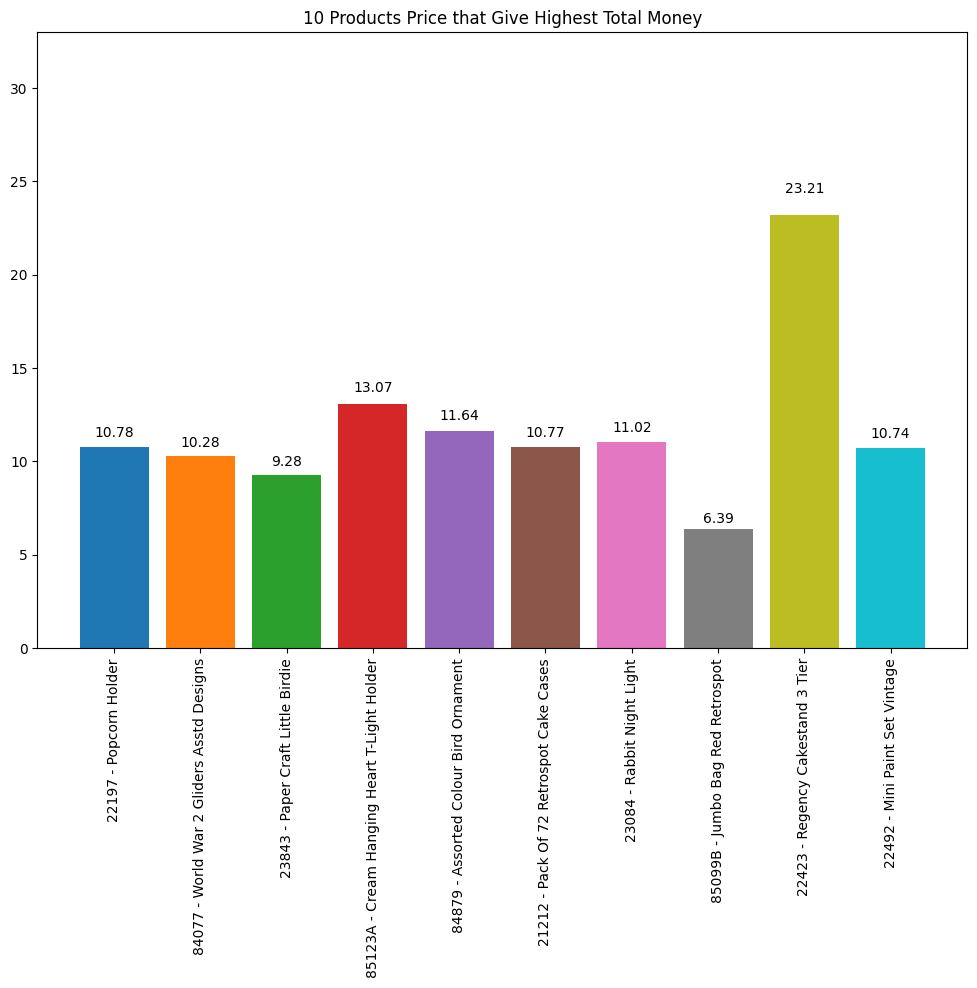

In [62]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    pricePiece = round(df['Price'].loc[df['ProductNo']==listProductNo[i]].mean(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,pricePiece*1.05,pricePiece,ha='center')
    plt.bar(x = labelx, height = pricePiece)

plt.ylim(0,33)
plt.title('10 Products Price that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

#### 10 Products Total Quantity that Give Highest Total Money

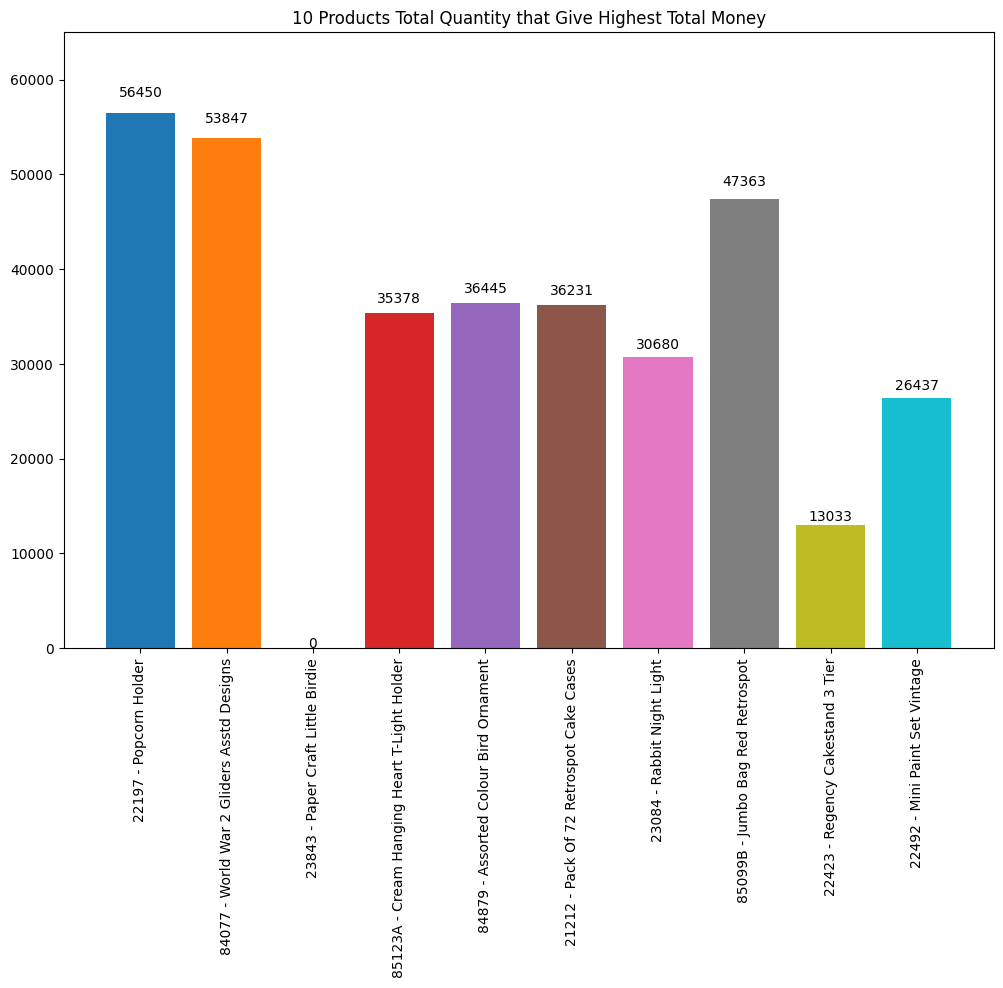

In [63]:
plt.figure(figsize=(12,8))

listProductNo = dfProduct['ProductNo'].unique().copy()
listProductName = dfProduct['ProductName'].unique().copy()

for i in range(len(listProductNo)):
    totalQuantity = round(df['Quantity'].loc[df['ProductNo']==listProductNo[i]].sum(),2)
    labelx = listProductNo[i]+' - '+listProductName[i]
    plt.text(labelx,totalQuantity*1.03,totalQuantity,ha='center')
    plt.bar(x = labelx, height = totalQuantity)

plt.ylim(0,65000)
plt.title('10 Products Total Quantity that Give Highest Total Money')
plt.xticks(rotation = 90)
plt.show()

#### 10 Countries that Give Total Highest Money

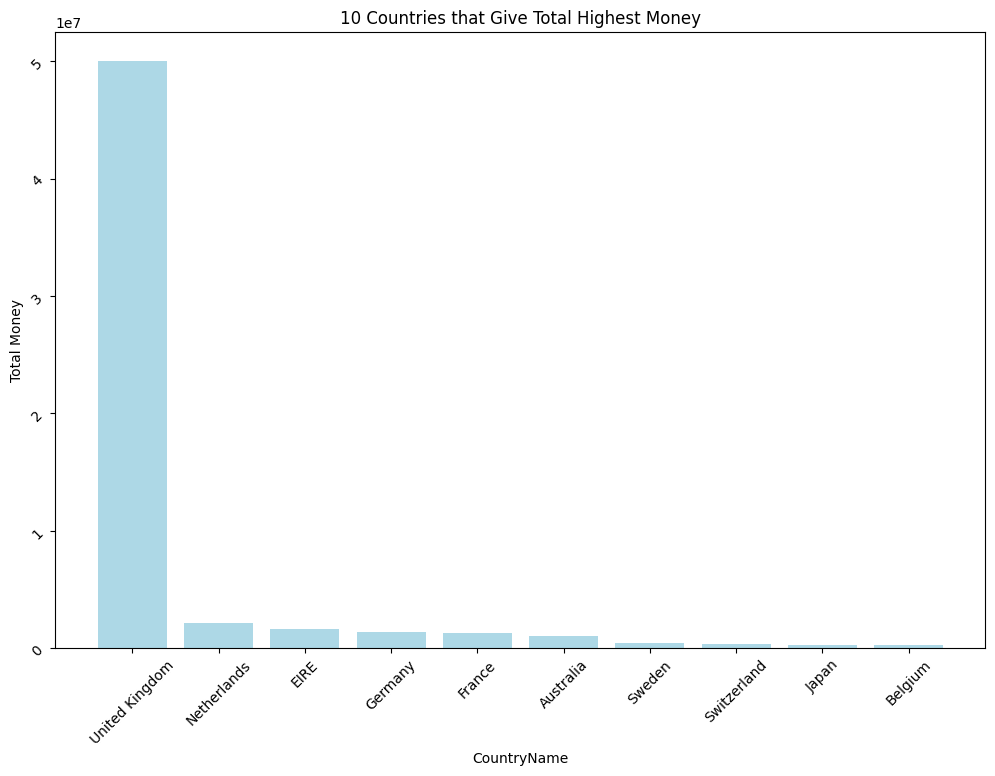

      CountryName   TotalMoney
0  United Kingdom  49994030.17
1     Netherlands   2147811.39
2            EIRE   1660645.07
3         Germany   1350265.40
4          France   1316880.98
5       Australia    988756.35
6          Sweden    396042.61
7     Switzerland    358423.61
8           Japan    283293.47
9         Belgium    271346.98


In [64]:
# Variable to Store
listCountry = df['Country'].unique()
listTotalMoney = []

# Loop to Store Data
for i in listCountry:
    totalMoney = round(df['TotalMoney'].loc[df['Country'] == i].sum(),2)
    listTotalMoney.append(totalMoney)

# Dictionary for Dataframe
dictCountry = {
    'CountryName' : listCountry,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfCountry = pd.DataFrame(dictCountry)
dfCountry = dfCountry.sort_values('TotalMoney',ascending = False).head(10)
dfCountry = dfCountry.reset_index(drop = True)

# Create Figure
plt.figure(figsize = (12,8))
plt.bar(data = dfCountry, x = 'CountryName',height = 'TotalMoney', color = 'lightblue')
plt.title('10 Countries that Give Total Highest Money')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('CountryName')
plt.ylabel('Total Money')
plt.show()

# Show dfCountry
print(dfCountry)

In [71]:
dfCountry.to_csv("dfCountry.csv")

#### Total Money Every Months in 2019

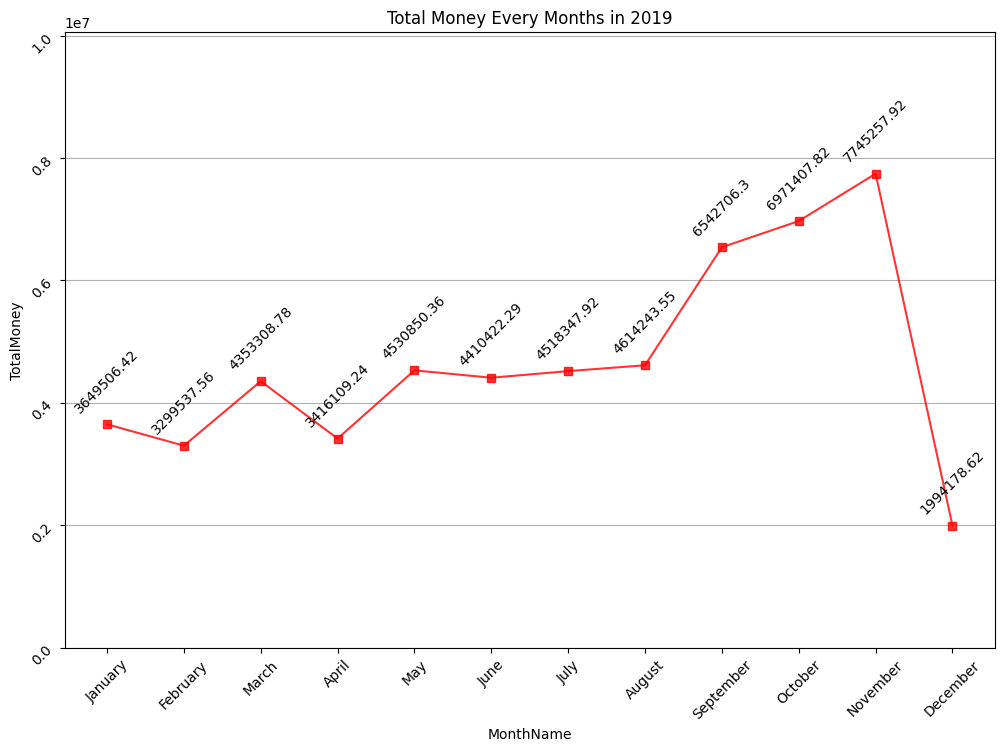

In [65]:
# Variable to Store
listMonth = []
listTotalMoney = []
for i in df['Month'].unique():
    monthName = dt.datetime.strptime(str(i), "%m")
    monthName = monthName.strftime("%B")
    listMonth.append(monthName)
for i in df['Month'].unique():
    totalMoney = round(df['TotalMoney'].loc[(df['Month']==i)&(df['Year']==2019)].sum(),2)
    listTotalMoney.append(totalMoney)
    
# Dictionary for DataFrame
dictMonth = {
    'MonthName' : listMonth,
    'TotalMoney' : listTotalMoney
}

# Adjust Data Frame
dfMonth = pd.DataFrame(dictMonth)
dfMonth = dfMonth.iloc[::-1]


# Create Figure
plt.figure(figsize = (12,8))
plt.plot(dfMonth['MonthName'], dfMonth['TotalMoney'], color = 'Red', marker = 's',alpha = 0.8)
plt.title('Total Money Every Months in 2019')
plt.yticks(rotation = 45)
plt.xticks(rotation = 45)
plt.xlabel('MonthName')
plt.ylabel('TotalMoney')
for i in dfMonth['MonthName']: 
    text = str(dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i].values[0])
    y = dfMonth['TotalMoney'].loc[dfMonth['MonthName'] == i]+(dfMonth['TotalMoney'].min()*0.1)
    plt.text(i,y,text, ha = 'center', rotation = 45) 
plt.ylim(0,dfMonth['TotalMoney'].max()*1.3)
plt.grid(axis = 'y')
plt.show()

In [72]:
dfMonth.to_csv("dfMonth.csv")

#### Country that Gives Highest Total Money from Each Month

In [66]:
def searchTotalMoney(country,month):
    return round(df['TotalMoney'].loc[(df['Country'] == country)&(df['Month'] == month)].sum(),2)

def searchHighestTotalMoneyCountry(month):
    listMoney = []
    maxCountry = 'none'
    for i in listCountry:
        total = searchTotalMoney(i,month)
        listMoney.append(total)
        maxMoney = max(listMoney) 
        if total >= maxMoney:
            maxCountry = i 
    return([maxMoney,maxCountry])

listTotalMoney = []
listHighCountry = []

for i in df['Month'].unique():
    templist = searchHighestTotalMoneyCountry(i)
    listTotalMoney.append(templist[0])
    listHighCountry.append(templist[1])

dictHighCountMonth = {
    'Month' : listMonth,
    'Country Name' : listHighCountry,
    'Total Money' : listTotalMoney
}             

dfCountMonth = pd.DataFrame(dictHighCountMonth)
dfCountMonth = dfCountMonth.iloc[::-1]
dfCountMonth = dfCountMonth.reset_index(drop = True)
dfCountMonth

,Month,Country Name,Total Money
0,January,United Kingdom,2766521.62
1,February,United Kingdom,2704022.15
2,March,United Kingdom,3537492.90
3,April,United Kingdom,3053768.60
4,May,United Kingdom,3689507.59
5,June,United Kingdom,3500065.77
6,July,United Kingdom,3765557.98
7,August,United Kingdom,3667938.41
8,September,United Kingdom,5480320.68
9,October,United Kingdom,5632406.43


In [73]:
dfCountMonth.to_csv("dfCountMonth.csv")

#### Total Money each Month that is Received from Top 10 Country that Give Highest Total Money in 2019

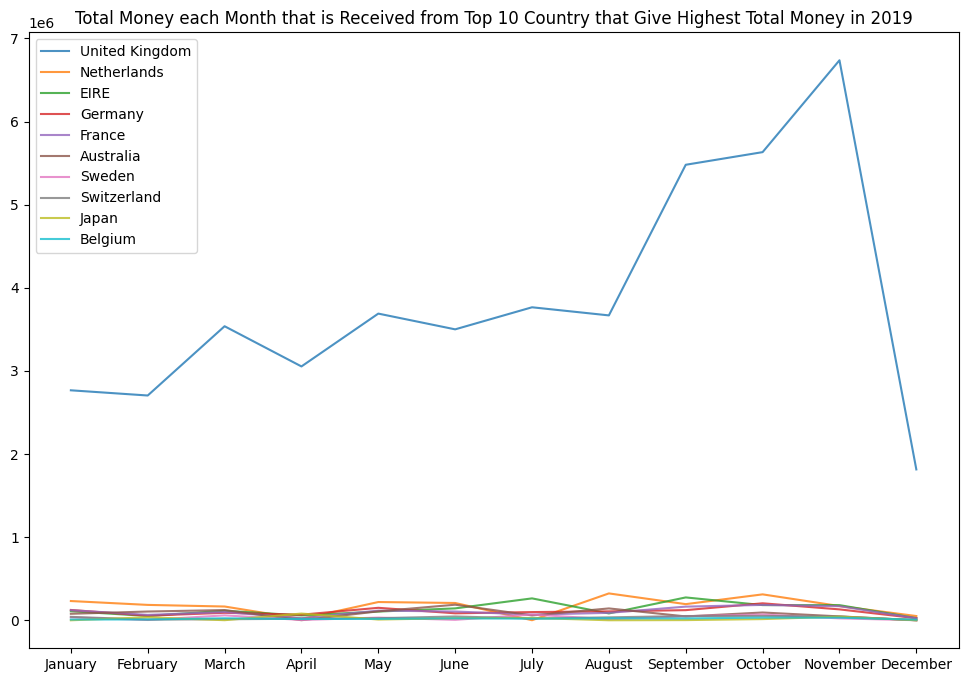

In [67]:
plt.figure(figsize = (12,8))
topTenCountry = dfCountry['CountryName'].unique().copy()
listMonthTopTen = listMonth.reverse()
listMonthTopTen = listMonth 

for i in topTenCountry:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['Country']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Country that Give Highest Total Money in 2019')
plt.legend(topTenCountry)
plt.show()

#### Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019

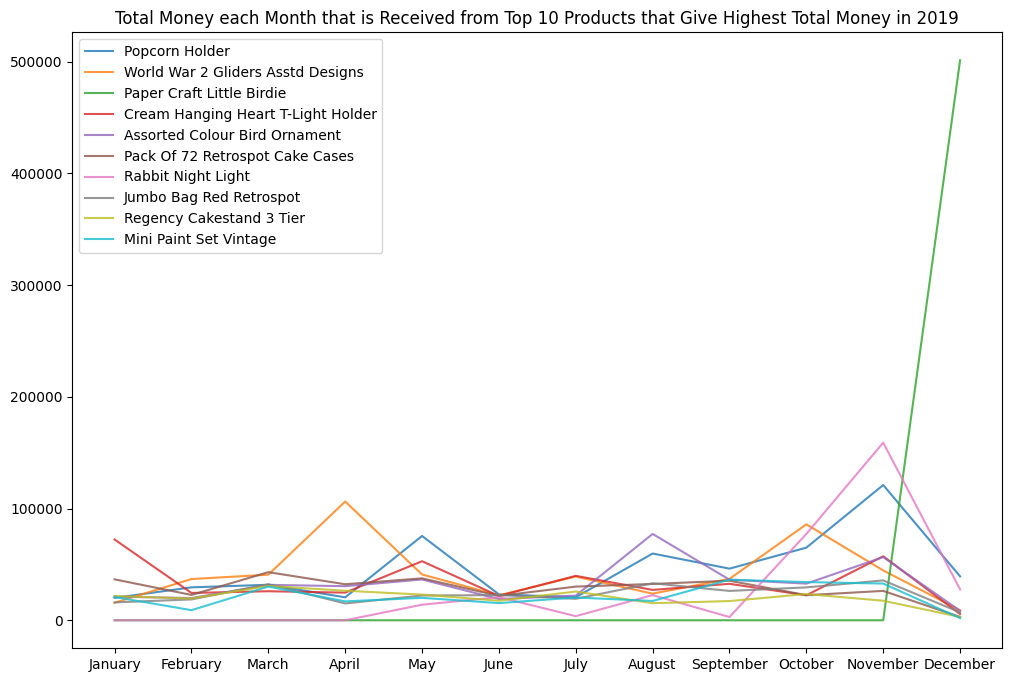

In [68]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['TotalMoney'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Money each Month that is Received from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

#### Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019

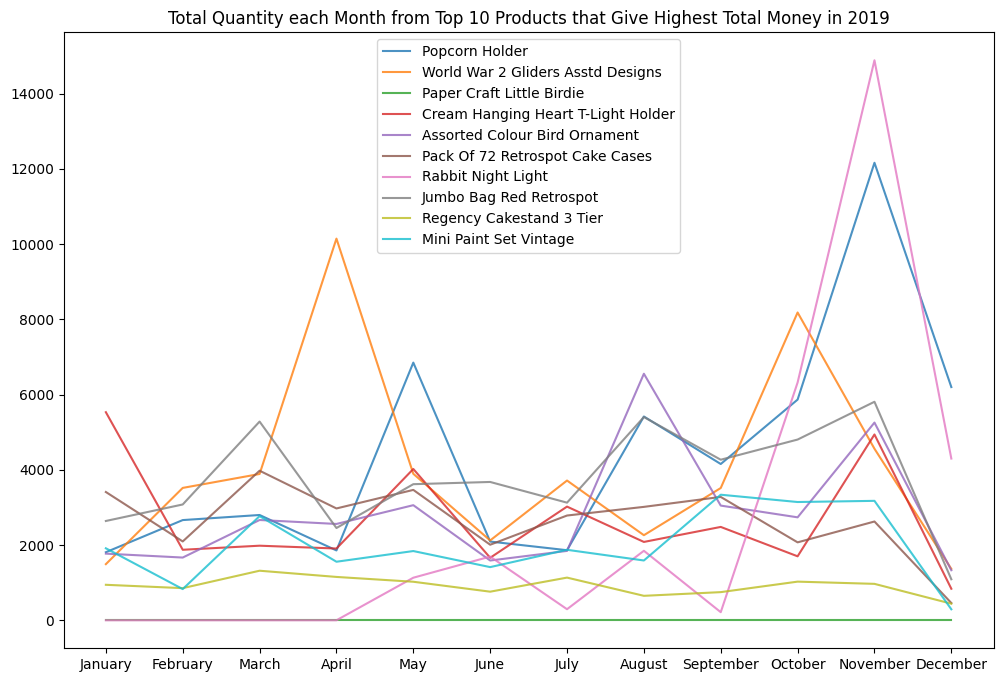

In [69]:
plt.figure(figsize = (12,8))
listProductNo = dfProduct['ProductNo'].unique().copy()  
listProductName = dfProduct['ProductName'].unique().copy()

for i in listProductNo:
    totalMoneyCountry = []
    for j in df['Month'].unique():
        moenyCountry = round(df['Quantity'].loc[(df['ProductNo']==i)&((df['Month']==j)&(df['Year']==2019))].sum(),2)
        totalMoneyCountry.append(moenyCountry)
    totalMoneyCountry.reverse()
    plt.plot(listMonthTopTen, totalMoneyCountry,alpha = 0.8) 

plt.title('Total Quantity each Month from Top 10 Products that Give Highest Total Money in 2019')
plt.legend(listProductName)
plt.show()

# Answer Given Question
#### How was the sales trend over the months?
Answer: Based on figure 'Total Money Every Months in 2019', this e commerce business sales over the months relatively increasing since January 2019 but on December 2019 the sales go down significantly. It is happened because based on figure 'Total Money each Month that is Received from Top 10 Country that Give Highest Total Money in 2019' shows that the sales to United Kingdom on December 2019 not as good as previous month
#### What are the most frequently purchased products?
Answer: Based on figure '10 Products Total Quantity that Give Highest Total Money', the most frequently purchased and profitable products are  Popcorn Holder, World War 2 Gliders Asstd Designs, Paper Craft Little Birdie, Cream Hanging Heart T-Light Holder, Assorted Colour Bird Ornament, Pack Of 72 Retrospot Cake Cases, Rabbit Night Light, Jumbo Bag Red Retrospot, Regency Cakestand 3 Tier, Mini Paint Set Vintage. However, from this figure, one of the product show 0 quantity but still include to figure '10 Products Price that Give Highest Total Money', it means that this product give profit loss but still many transaction still buy this product.
#### How many products does the customer purchase in each transaction?
Answer: Based on figure '10 Transactions that Give Highest Total Money', customer seems buy different amount of product based on their need but here we can see the different can be very significant.
#### What are the most profitable segment customers?
Answer: The most profitable segment customers are customers that buy product include in figure '10 Products Price that Give Highest Total Money' , figure '10 Products Total Quantity that Give Highest Total Money' and figure '10 Products Total Quantity that Give Highest Total Money' and customers that are from country that include in figure '10 Countries that Give Total Highest Money'. 
#### Based on your findings, what strategy could you recommend to the business to gain more profit?
Answer: Based on my findings, there are several strategy to gain more profit. First, based on figure '10 Products Total Quantity that Give Highest Total Money', there is a product that gives 0 value but still include in figure '10 Products that Give Highest Total Money', it means that this product need quality improvement so it can give more profit in the future. Second, Increase sales in countries included in figure '10 Countries that Give Total Highest Money' with various marketing methods. Third, Increase sales in products included in figure '10 Products that Give Highest Total Money' with various marketing methods. Fourth, Improving the quality of products that are not included in figure '10 Products that Give Highest Total Money' to attract buyers. Last, Advertise products in countries that are not included in figure '10 Countries that Give Total Highest Money' to attract and increase the interest of buyers from these countries.